In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import continuous_probabilitic_methods as cpm

In [2]:
df = pd.read_csv("lemonade.csv")

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.Date = pd.to_datetime(df.Date).sort_values()
df.index = df.Date

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Day          365 non-null    object        
 2   Temperature  365 non-null    float64       
 3   Rainfall     365 non-null    float64       
 4   Flyers       365 non-null    int64         
 5   Price        365 non-null    float64       
 6   Sales        365 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 22.8+ KB


In [6]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [7]:
df.index.max(), df.index.min(), df.index.max() - df.index.min()

(Timestamp('2017-12-31 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timedelta('364 days 00:00:00'))

In [8]:
# check out the stats with a .describe()
df.groupby('Day')[['Sales']].describe()

Sales                                                       
          count       mean        std   min    25%   50%    75%    max
Day                                                                   
Friday     52.0  25.384615   7.010227  11.0  21.00  25.5  29.25   41.0
Monday     52.0  29.307692  29.913954  12.0  20.75  25.0  30.00  235.0
Saturday   52.0  27.269231  17.711318  13.0  19.75  25.0  30.00  143.0
Sunday     53.0  27.094340  19.676484   7.0  19.00  25.0  29.00  158.0
Thursday   52.0  25.673077   6.729278  13.0  21.00  25.0  30.00   43.0
Tuesday    52.0  34.750000  70.898125  10.0  21.00  25.0  30.00  534.0
Wednesday  52.0  25.596154   6.622184  12.0  20.00  25.0  30.00   41.0

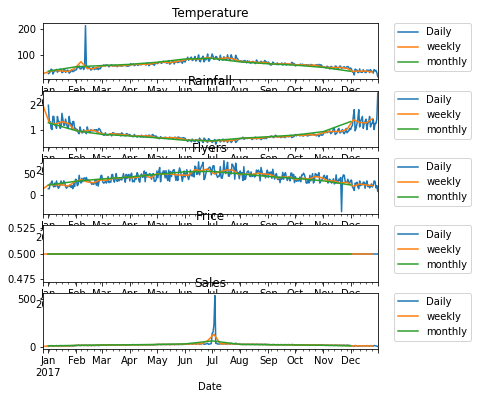

In [9]:
i = 0
plt.figure(figsize=(6,6))
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
#         i = enumerate(col)
        plot_number = i + 1
        plt.subplot(5,1,plot_number)
        y = df[col]
        y.plot(label='Daily')
        y.resample('W').mean().plot(label="weekly")
        y.resample('M').mean().plot(label='monthly')
        plt.title(label = col)
#         plt.legend(loc='upper right')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        plt.tight_layout
        i += 1

- I think I already see the anomoly...

### 1.a Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [10]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        inner_lower, inner_upper = cpm.get_lower_and_upper_bounds(df[col], 1.5)
        print(f'the inner lower bound for {col} is {inner_lower}')
#         print(f'the inner upper bound for {col} is {inner_upper}')

the inner lower bound for Temperature is 16.700000000000003
the inner lower bound for Rainfall is 0.26
the inner lower bound for Flyers is 4.0
the inner lower bound for Price is 0.5
the inner lower bound for Sales is 5.0


- Looks fine so far

### 1.b Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [11]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        inner_lower, inner_upper = cpm.get_lower_and_upper_bounds(df[col], 1.5)
#         print(f'the inner lower bound for {col} is {inner_lower}')
        print(f'the inner upper bound for {col} is {inner_upper}')

the inner upper bound for Temperature is 104.7
the inner upper bound for Rainfall is 1.3
the inner upper bound for Flyers is 76.0
the inner upper bound for Price is 0.5
the inner upper bound for Sales is 45.0


- Also nothing unusual about the bounds

### 1.c Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [12]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        inner_lower, inner_upper = cpm.get_lower_and_upper_bounds(df[col], 3)
        print(f'the outer lower bound for {col} is {inner_lower}')
#         print(f'the outer upper bound for {col} is {inner_upper}')

the outer lower bound for Temperature is -16.299999999999997
the outer lower bound for Rainfall is -0.13
the outer lower bound for Flyers is -23.0
the outer lower bound for Price is 0.5
the outer lower bound for Sales is -10.0


- The lower bound for temp is a little unusual, but not off the charts
- Can't have negative rainfall
- Can't have negative flyers, i think
- Can't have negative sales either

### 1.d Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [13]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        inner_lower, inner_upper = cpm.get_lower_and_upper_bounds(df[col], 3)
#         print(f'the outer lower bound for {col} is {inner_lower}')
        print(f'the outer upper bound for {col} is {inner_upper}')

the outer upper bound for Temperature is 137.7
the outer upper bound for Rainfall is 1.69
the outer upper bound for Flyers is 103.0
the outer upper bound for Price is 0.5
the outer upper bound for Sales is 60.0


- That upper temp is too hot
- Otherwise, nothing terribly amiss here

In [14]:
## This code would draw a sns boxplot of all columns with standard outliers
# # iterate through columns and create histograms
# for col in df.columns:
# #     determine that it is a number type
#     if np.issubdtype(df[col].dtype, np.number):
#         inner_lower, inner_upper = cpm.get_lower_and_upper_bounds(df[col], 3)
#         sns.boxplot(data=df, x=col)
#         plt.show()

### 2. a Identify if any columns in lemonade.csv are normally distributed. 

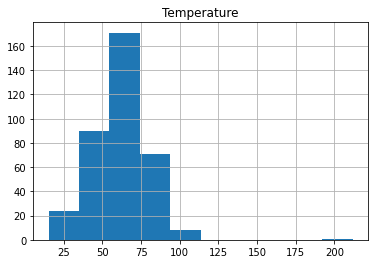

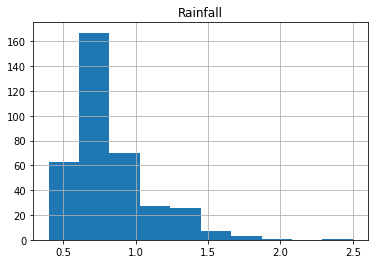

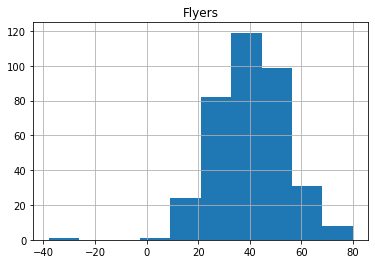

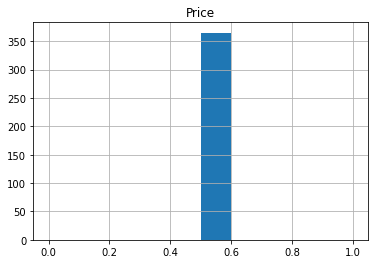

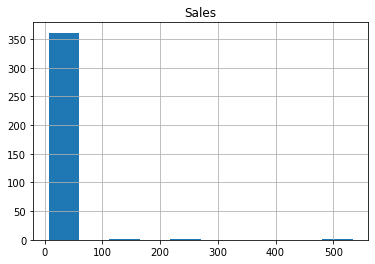

In [15]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(label=col)
        plt.show()

- Temperature, Rainfall and Flyers are normally distributed

### 2.b For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

    - Do these make sense?
    - Should certain outliers be kept or removed?

In [16]:
# # z-score:
# # subtract from the mean, divide by the standard deviation
# # i.e (x - x_mean) / x_std

# df['temp_zscore'] = ((df['Temperature'] - df['Temperature'].mean())
#                      / df['Temperature'].std())
# df['rain_zscore'] = ((df['Rainfall'] - df['Rainfall'].mean())
#                      / df['Rainfall'].std())
# df['flyers_zscore'] = ((df['Flyers'] - df['Flyers'].mean())
#                      / df['Flyers'].std())
# df.head()

In [17]:
# a for loop to systematically add a zscore column for every normally distr. col.

# define the normally distributed columns:
normal_cols = ['Temperature','Rainfall','Flyers']
# create an empty dictionary to store the zscore array, to be appended to the df later
result = {}
# for loop to add a zed score col to the df, one for each normally distr. col.
for col in normal_cols:
    # calculate zed score
    z_score = ((df[col] - df[col].mean()) / df[col].std())
    # add resulting array to the result dictionary created above
    result[f'{col}_zscore'] = z_score
# turn these result arrays into a datafram
result = pd.DataFrame(result)
# and concatenate
zscore_df = pd.concat([df,result], axis = 1).drop(columns='Date')
zscore_df

,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore
Date,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927
2017-01-02,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972
2017-01-05,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297
...,...,...,...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19,-1.024260,0.635391,-0.515297
2017-12-28,Thursday,37.8,1.25,32,0.5,16,-1.295189,1.548165,-0.587832
2017-12-29,Friday,39.5,1.25,17,0.5,15,-1.201194,1.548165,-1.675857


In [18]:
zscore_df.Temperature[zscore_df.Temperature_zscore.abs() >=2]

Date
2017-02-11    212.0
2017-06-16     99.3
2017-06-26    102.6
2017-07-01    102.9
2017-07-10     98.0
2017-07-18     99.3
2017-07-22     99.6
2017-07-27     97.9
2017-12-05     22.0
2017-12-31     15.1
Name: Temperature, dtype: float64

- The temperature on 11feb2017 makes no sense

In [19]:
zscore_df.Rainfall[zscore_df.Rainfall_zscore.abs() >=2]

Date
2017-01-01    2.00
2017-01-06    1.54
2017-01-07    1.54
2017-01-11    1.54
2017-01-16    1.67
2017-01-17    1.43
2017-01-20    1.43
2017-01-24    1.54
2017-12-04    1.54
2017-12-05    1.82
2017-12-09    1.43
2017-12-10    1.82
2017-12-13    1.43
2017-12-14    1.54
2017-12-18    1.43
2017-12-22    1.54
2017-12-26    1.43
2017-12-30    1.43
2017-12-31    2.50
Name: Rainfall, dtype: float64

- I don't see any rainfall amounts that are off the scales

In [20]:
zscore_df.Flyers[zscore_df.Flyers_zscore.abs() >=2]

Date
2017-06-16    77
2017-06-20    70
2017-06-21    76
2017-07-02    68
2017-07-03    68
2017-07-14    80
2017-07-18    76
2017-07-23    72
2017-07-24    69
2017-07-27    74
2017-11-21   -38
2017-12-05    11
2017-12-31     9
Name: Flyers, dtype: int64

- We can't have negative flyers, unless this is a lemonade stand with particularly sophisticated inventory control

### 3 Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [21]:
zscore_df.Temperature[zscore_df.Temperature_zscore.abs() >=3]

Date
2017-02-11    212.0
Name: Temperature, dtype: float64

In [22]:
zscore_df.Rainfall[zscore_df.Rainfall_zscore.abs() >=3]

Date
2017-01-01    2.00
2017-01-16    1.67
2017-12-05    1.82
2017-12-10    1.82
2017-12-31    2.50
Name: Rainfall, dtype: float64

- Ok, now that I know these are sigma 3...well i still think they need to stay put

In [23]:
zscore_df.Flyers[zscore_df.Flyers_zscore.abs() >=3]

Date
2017-11-21   -38
Name: Flyers, dtype: int64

- I stll think the only one to go is the negative